# Diffusion of Coronavirus using networkx

<img src="https://file1.science-et-vie.com/var/scienceetvie/storage/images/1/1/0/110693/dossier-coronavirus-suivez-les-recherches-sur-pandemie.jpg?alias=exact1024x768_l" alt="Meatball Sub" width="500"/>

In this notebook, we propose to study the diffusion of the Coronavirus Covid-19. One way to represent getting sick would be to look at the number of acrs connecting one person to another sick person.

The classic epidemic models (as described in the SIR epidemic models module or the SI models) were constructed as sets of ordinary differential equations (EDO), which implies several simplifying hypotheses. Ordinary differential equations with a given set of initial conditions always lead to exactly the same result. These models always consider all individuals to be equal, which implies that two individuals can interact with the same probability. This is hardly ever true in real systems.

Networking and the epidemiology of directly transmitted infectious diseases are fundamentally linked. The foundations of epidemiology and of the first epidemiological models rested on a random mixture on the scale of the population, but in practice, each individual has a finite set of contacts to which he can transmit the infection: the set of all these contacts form a network. Knowledge of the structure of the network allows models to calculate epidemic dynamics at the population level from the behavior of infections.

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

### Networkx

We consider two models for interaction networks. The Erdos-Renyi model which has a Poisson degree distribution and the Barabasi-Albert model.

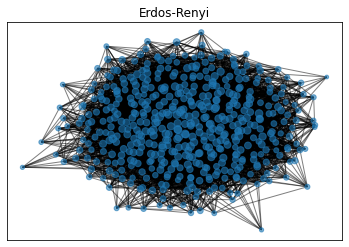

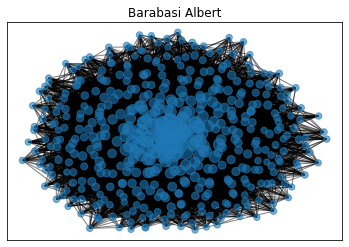

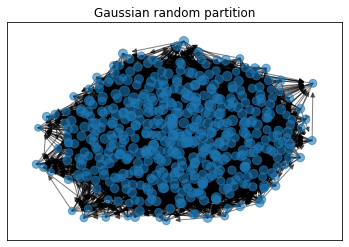

In [2]:
# Taille de la population
N = 500
k = 20
# erdos renyi network
G1 = nx.erdos_renyi_graph(N, k/N)
# barabasi network
G2 = nx.barabasi_albert_graph(N, k)
G3 = nx.gaussian_random_partition_graph(N,20,20,k/N,k/N)

pos1 = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos1, alpha = 0.6, node_size=[2*i for i in list(dict(G1.degree).values())])
nx.draw_networkx_edges(G1, pos1, alpha=0.5)
plt.title("Erdos-Renyi")
plt.show()

pos2 = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos2, alpha = 0.6, node_size=[2*i for i in list(dict(G2.degree).values())])
nx.draw_networkx_edges(G2, pos2, alpha=0.5)
plt.title("Barabasi Albert")
plt.show()

pos3 = nx.spring_layout(G3)
nx.draw_networkx_nodes(G3, pos3, alpha = 0.6, node_size=[2*i for i in list(dict(G3.degree).values())])
nx.draw_networkx_edges(G3, pos3, alpha=0.5)
plt.title("Gaussian random partition")
plt.show()

# 1. The SI model
The SI model contains only two classes of individuals: those who are not infected with the disease (note S as susceptible or healthy) and those who are infected with the disease (note I as infected). The SI model is the simplest form of all the contagious disease models. Individuals are born in simulation without immunity (sensitive). Once infected and without treatment, individuals remain infected and infectious throughout their lives and remain in contact with the susceptible population.[](http://)


In [3]:
def SI(G,Nb_inf_init,HM, N, T):
    """ function that runs a simulation of an SI model on a network.
    INPUT:
        G(networkx) : Graph
        Nb_inf_init : Initial number of infected people (nodes)
        HM(float) : Infection probability
        N(int): number of nodes (or people)
        T(int): number of time steps simulated
    """
    pos = nx.spring_layout(G)
    A = nx.to_numpy_array(G)
    # setting initial conditions
    sup = np.zeros(T)
    inf = np.zeros(T)
    nb_inf_t = np.zeros(T)
    inf[0] = Nb_inf_init
    sup[0] = N - Nb_inf_init
    nb_inf_t[0] = inf[0]

    for u in G.nodes():
        G.nodes[u]["state"] = 0
        G.nodes[u]["noeux_associes"] = [n for n in G.neighbors(u)]
    init = random.sample(G.nodes(), Nb_inf_init)
    for u in init:
        G.nodes[u]["state"] = 1

    for t in range(1,T):
        sup[t] = sup[t-1]
        inf[t] = inf[t-1]
        for u in G.nodes:
            # si infecté
            if G.nodes[u]["state"] == 0:
                nb_friend_infected = [G.nodes[n]["state"] == 1 for n in G.nodes[u]["noeux_associes"]].count(True)
                for n in G.nodes[u]["noeux_associes"]:
                    if G.nodes[n]["state"] == 1: # si voisin infecté
                        # with HM infect
                        if np.random.rand() < HM:
                            G.nodes[u]["state"] = 1
                            inf[t] += 1
                            sup[t] += -1
                            break
        nb_inf_t[t] = inf[t]-inf[t-1]
    return sup, inf, nb_inf_t

In [4]:
T = 100
N = 500 # size of population
HM = 0.03
Nb_inf_init = 2 #  Initial numbre of infected person

1. ## With the graph of Erdos Renyi

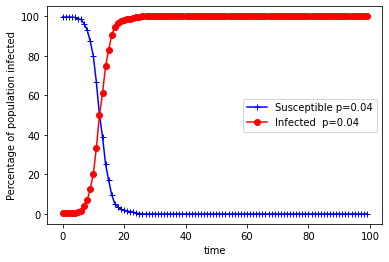

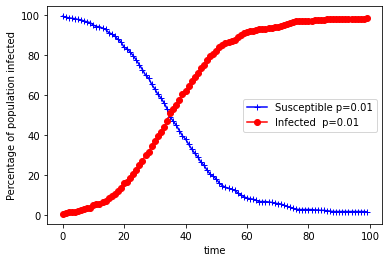

In [5]:
# mean degree of the networks
k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot((100/N)*s_erdos, color='b',marker='+', label="Susceptible p=0.04")
plt.plot((100/N)*inf_erdos, color='r',marker='o', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()
# mean degree of the networks
k = 5
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot((100/N)*s_erdos,"b",marker='+', label="Susceptible p=0.01")
plt.plot((100/N)*inf_erdos,"r",marker='o', label="Infected  p=0.01")

plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()

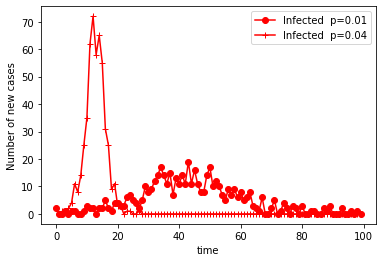

In [6]:
# mean degree of the networks
k = 5
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='o', label="Infected  p=0.01")
plt.xlabel("time")
plt.ylabel("Number of new cases")

k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='+', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Number of new cases")

plt.legend()
plt.show()
##

2. ## Graphe de Erdos Renyi - Barabasi-Albert

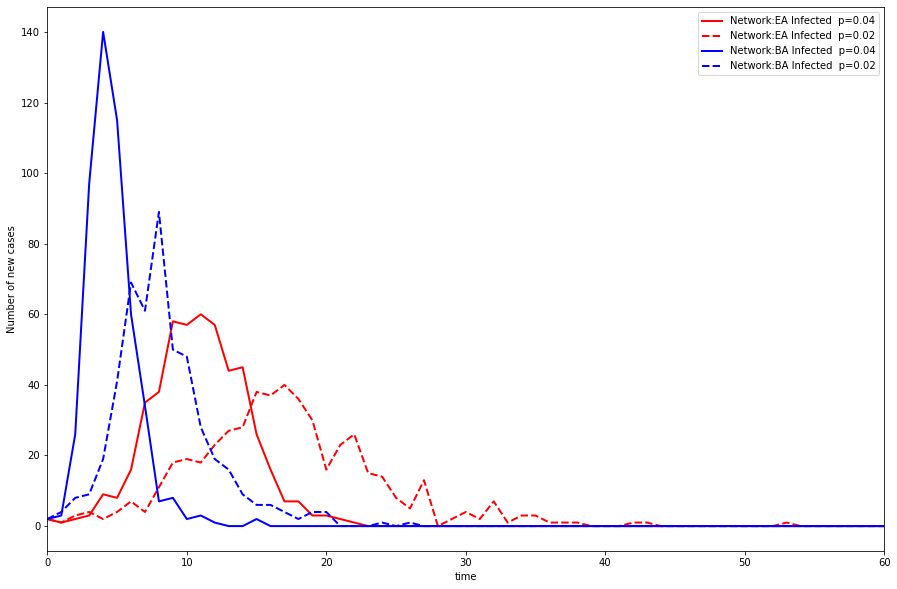

In [7]:
# mean degree of the networks
k = 20
N = 500
Nb_inf_init = 2
# defining an erdos renyi network
G1 = nx.erdos_renyi_graph(N,k/N)
G1_demi = nx.erdos_renyi_graph(N,k/N *0.5)
G2 = nx.barabasi_albert_graph(N, k)
G2_demi = nx.barabasi_albert_graph(N, int(k*0.5))

s_ER, inf_ER,nb_inf_t_ER = SI(G1,Nb_inf_init,HM, N, T)
s_ER_demi, inf_ER_demi,nb_inf_t_ER_demi = SI(G1_demi,Nb_inf_init,HM, N, T)

s_BA, inf_BA,nb_inf_t_BA = SI(G2,Nb_inf_init,HM, N, T)
s_BA_demi, inf_BA_demi,nb_inf_t_BA_demi = SI(G2_demi,Nb_inf_init,HM, N, T)
plt.figure(figsize=(15,10))
plt.plot(nb_inf_t_ER,"r", linewidth=2, label="Network:EA Infected  p=0.04")
plt.plot(nb_inf_t_ER_demi,"r--", linewidth=2, label="Network:EA Infected  p=0.02")


plt.plot(nb_inf_t_BA,"b", linewidth=2, label="Network:BA Infected  p=0.04")
plt.plot(nb_inf_t_BA_demi,"b--", linewidth=2, label="Network:BA Infected  p=0.02")
plt.xlabel("time")
plt.ylabel("Number of new cases")
plt.xlim(0,60)

plt.legend()
plt.show()

# 2. The SIR model


In [8]:
def SIR(G,Nb_inf_init,Gamma,HM, N, T):
    """ function that runs a simulation of an SIR model on a network.
    Args:
        Gamma(float): recovery rate
        Beta(float): infection probability
        Rho(float): initial fraction of infected individuals
        N(int): number of agents (nodes)
        T(int): number of time steps simulated
    """
    A = nx.to_numpy_array(G)
    # setting initial conditions
    s = np.zeros(T)
    inf = np.zeros(T)
    r = np.zeros(T)
    inf[0] = Nb_inf_init
    s[0] = N - Nb_inf_init
    """Make a graph with some infected nodes."""
    for u in G.nodes():
        G.nodes[u]["state"] = 0
        G.nodes[u]["TimeInfected"] = 0
        G.nodes[u]["noeux_associes"] = [n for n in G.neighbors(u)]

    init = random.sample(G.nodes(), Nb_inf_init)
    for u in init:
        G.nodes[u]["state"] = 1
        G.nodes[u]["TimeInfected"] = 1
    # running simulation
    for t in range(1,T):
        s[t] = s[t-1]
        inf[t] = inf[t-1]
        r[t] = r[t-1]
        # Check which persons have recovered
        for u in G.nodes:
            # if infected
            if G.nodes[u]["state"] == 1:
                if G.nodes[u]["TimeInfected"] < Gamma:
                    G.nodes[u]["TimeInfected"] += 1
                else:
                    G.nodes[u]["state"] = 2 #"recovered"
                    r[t] += 1
                    inf[t] += -1
        # check contagion    
        for u in G.nodes:
            #if susceptible
            if G.nodes[u]["state"] == 0:
                nb_friend_infected = [G.nodes[n]["state"] == 1 for n in G.nodes[u]["noeux_associes"]].count(True)
                #print(nb_friend_infected)
                for n in G.nodes[u]["noeux_associes"]:
                    if G.nodes[n]["state"] == 1: # if friend is infected
                        # with HM infect
                        if np.random.rand() < HM:
                            G.nodes[u]["state"] = 1
                            inf[t] += 1
                            s[t] += -1
                            break
    
    return s, inf,r

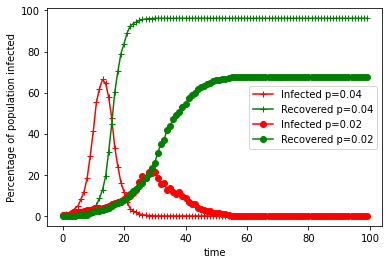

In [9]:
np.random.seed(0)
# time of simulation
T = 100
# number of agents
N = 500
HM = 0.03
Gamma = 5
Nb_inf_init = 2
# mean degree of the networks
k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,r_erdos = SIR(G,Nb_inf_init,Gamma,HM, N, T)
#plt.plot((100/N)*s_erdos, color='b',marker='+', label="Susceptible k=20")
plt.plot((100/N)*inf_erdos, color='r',marker='+', label="Infected p=0.04")
plt.plot((100/N)*r_erdos, color='g',marker='+', label="Recovered p=0.04")

#
# mean degree of the networks
k = 10
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,r_erdos = SIR(G,Nb_inf_init,Gamma,HM, N, T)
#plt.plot((100/N)*s_erdos,color="b",marker='o',label="Susceptible k=10")
plt.plot((100/N)*inf_erdos,color="r",marker='o',label="Infected p=0.02")
plt.plot((100/N)*r_erdos,color='g',marker='o',label="Recovered p=0.02")

plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()